# Final Project

Github: https://github.com/haileyj7/DSCI235

Data Sources:
- https://data.world/fivethirtyeight/bechdel
- https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv

## Project Description
Representation is a hot topic right now, and many pushes are being made to diversify the entertainment industry and represent different identities more often and in better ways. One measure of inclusivity that has gained much traction is the Bechdel Test, which started from a comic strip by Alison Bechdel in 1985.

For a film to “pass” the Bechdel Test, it must (1) have two named female characters, who (2) talk to each other, and (3) the conversation can’t be about a man. It's not an exhaustive measure of feminism, but is one insight into representation of women in movies.

Some of the questions I intend to answer in this project include:
- How have bechdel score rates changed over time?
- Do bechdel scores have an influence on ratings or ROI?
- Do movies with lower/higher budgets have lower/higher bechdel scores? What does this say about representation in more 'mainstream' movies?


In [117]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%autosave 60

Autosaving every 60 seconds


Loading in the data:

In [118]:
movies_full = pd.read_csv('https://raw.githubusercontent.com/haileyj7/DSCI235/main/bechdel_movies.csv', dtype={'imdb': 'str'})
movies = movies_full.drop(columns=['test','code','period code', 'decade code'])
movies = movies.sort_values(['year'])
movies = movies.rename(columns={'intgross': 'wwgross', 'intgross_2013$': 'wwgross_2013$', 'clean_test': 'bechdel'})

In [119]:
movies = movies.sort_values('year', ascending=False)

In [120]:
metadata = pd.read_csv('https://raw.githubusercontent.com/haileyj7/DSCI235/main/movies_metadata.csv', dtype = {'imdb_id': 'str'}, engine='python')
metadata = metadata.drop(columns=['adult', 'belongs_to_collection', 'genres', 'homepage', 'overview', 'poster_path',
                                  'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline',
                                  'video', 'budget', 'original_language', 'original_title', 'release_date', 'revenue',
                                 'vote_count'])

I will combine these two datasets later so I can look at ratings and bechdel scores in the same dataset.

In [121]:
index2 = movies['imdb'].isin(metadata['imdb_id'])
movies_g = movies[index2]
movies_g = movies_g.sort_values('imdb')
movies_g.reset_index(inplace=True)
movies_g = movies_g.drop(columns=['title'])
movies_g

,index,year,imdb,bechdel,binary,budget,domgross,wwgross,budget_2013$,domgross_2013$,wwgross_2013$
0,1177,2001,tt0035423,men,FAIL,48000000,47095453.0,70937778.0,63160606,61970361.0,93343188.0
1,1793,1970,tt0065466,ok,PASS,1000000,9000000.0,9000000.0,5997631,53978683.0,53978683.0
2,1788,1971,tt0067065,notalk,FAIL,2500000,12300000.0,12300000.0,14386286,70780525.0,70780525.0
3,1791,1971,tt0067116,notalk,FAIL,2200000,41158757.0,41158757.0,12659931,236848653.0,236848653.0
4,1789,1971,tt0067741,notalk,FAIL,53012938,70327868.0,107190108.0,305063707,404702718.0,616827003.0
...,...,...,...,...,...,...,...,...,...,...,...
1778,98,2013,tt2334879,men,FAIL,150000000,73103784.0,205440387.0,150000000,73103784.0,205440387.0
1779,58,2013,tt2364841,nowomen,FAIL,30000000,19316646.0,62616646.0,30000000,19316646.0,62616646.0
1780,71,2013,tt2404311,men,FAIL,30000000,36918811.0,51078541.0,30000000,36918811.0,51078541.0
1781,76,2013,tt2404463,ok,PASS,43000000,159581587.0,230781587.0,43000000,159581587.0,230781587.0


First, I want to look at how frequency of different bechdel scores have changed over time.

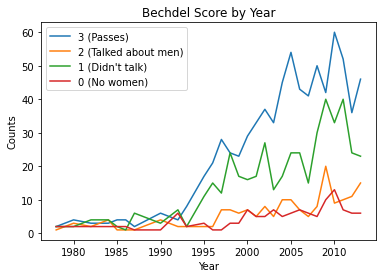

In [122]:
# ok = 3, men = 2, notalk = 1, nowomen = 0, dubious = debated
movies_g['year2'] = movies_g['year']
movies_g = movies_g.set_index('year2')
scores_counts = pd.DataFrame(dtype='int64')

def scores(x):
    global scores_counts
    year = x.index.get_level_values(0)[0]
    totals = x['bechdel'].value_counts()
    totals = totals.sort_index(axis=0)
    if totals.shape == (5,):
        toConcat = pd.DataFrame([[year, totals[4], totals[1], totals[2], totals[3]]],
                                 columns=['year','3','2','1','0'])
        scores_counts = pd.concat([scores_counts, toConcat])
                                 
by_year = movies_g.groupby(['year'])
by_year.apply(scores)

scores_counts = scores_counts.reset_index()
scores_counts = scores_counts.drop(columns=['index'])

plt.plot('year', '3', '', data=scores_counts, label='3 (Passes)')
plt.plot('year', '2', '', data=scores_counts, label='2 (Talked about men)')
plt.plot('year', '1', '', data=scores_counts, label='1 (Didn\'t talk)')
plt.plot('year', '0', '', data=scores_counts, label='0 (No women)')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Bechdel Score by Year');

There aren't many counts until around 1995 when there is more data collected, so let's focus on that.

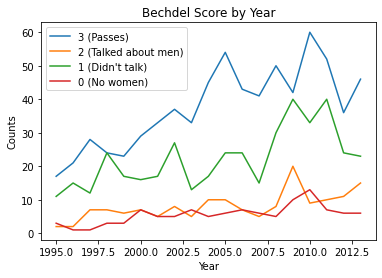

In [123]:
recent = scores_counts[10:]
recent = recent.reset_index()

plt.plot('year', '3', '', data=recent, label='3 (Passes)')
plt.plot('year', '2', '', data=recent, label='2 (Talked about men)')
plt.plot('year', '1', '', data=recent, label='1 (Didn\'t talk)')
plt.plot('year', '0', '', data=recent, label='0 (No women)')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Bechdel Score by Year');

The passing score is the highest all around! Now what if I go by the binary PASS/FAIL?

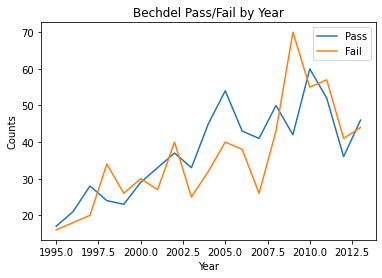

In [124]:
recentpf = recent
recentpf['pass'] = recentpf['3']
recentpf['fail'] = recentpf['2'] + recentpf['1'] + recentpf['0']
recentpf = recentpf.drop(columns=['3','2','1','0'])

plt.plot('year', 'pass', data=recentpf, label='Pass')
plt.plot('year', 'fail', data=recentpf, label='Fail')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Bechdel Pass/Fail by Year');

Now it's much closer. I thought that we'd see higher frequencies of passing scores as time increased, but I don't see evidence of that happening. Rather, we just have more movies in the dataset for later years, but not higher scores.

To look at Return on Investment scores, I will add a category where I take the worldwide gross values in 2013 dollars, divide by the budget in 2013 dollars, and then multiply by 100.

In [125]:
movies_g['ROI'] = (movies_g['wwgross_2013$'] / movies_g['budget_2013$']) * 100
small = movies_g[movies_g['ROI'] < 400]
small.head()

,index,year,imdb,bechdel,binary,budget,domgross,wwgross,budget_2013$,domgross_2013$,wwgross_2013$,ROI
year2,,,,,,,,,,,,
2001,1177,2001,tt0035423,men,FAIL,48000000,47095453.0,70937778.0,63160606,61970361.0,93343188.0,147.787037
1971,1789,1971,tt0067741,notalk,FAIL,53012938,70327868.0,107190108.0,305063707,404702718.0,616827003.0,202.196128
1971,1790,1971,tt0067800,notalk,FAIL,25000000,10324441.0,11253821.0,143862856,59412143.0,64760273.0,45.015284
1971,1792,1971,tt0067992,men,FAIL,3000000,4000000.0,4000000.0,17263543,23018057.0,23018057.0,133.333331
1973,1781,1973,tt0068699,notalk,FAIL,15700000,15700000.0,15700000.0,82329139,82329139.0,82329139.0,100.000000


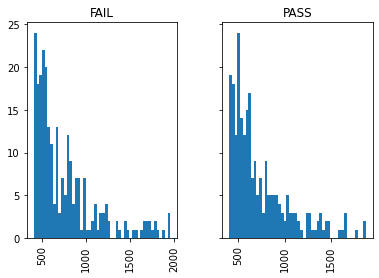

In [126]:
medium = movies_g[(movies_g['ROI'] > 399) & (movies_g['ROI'] < 2000)]
medium['ROI'].hist(by=medium['binary'], sharey = True, bins=50);

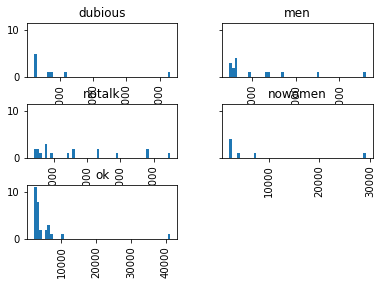

In [127]:
large = movies_g[movies_g['ROI'] > 1999]
large['ROI'].hist(by=large['bechdel'],sharey=True,bins=50);

This is just exploratory analysis, but there doesn't seem to be much of a connection between bechdel scores and ROI.

In [128]:
index = metadata['imdb_id'].isin(movies['imdb'])
meta_g = metadata[index]
meta_g = meta_g.sort_values('imdb_id')
meta_g.reset_index(inplace=True)
meta_g

,index,id,imdb_id,popularity,runtime,title,vote_average
0,4862,11232,tt0035423,7.196356,118.0,Kate & Leopold,6.0
1,7649,5722,tt0065466,3.129943,109.0,Beyond the Valley of the Dolls,6.6
2,2420,1687,tt0067065,12.120267,98.0,Escape from the Planet of the Apes,6.3
3,1844,1051,tt0067116,6.694959,104.0,The French Connection,7.4
4,3607,482,tt0067741,3.73688,100.0,Shaft,6.5
...,...,...,...,...,...,...,...
1778,21162,117251,tt2334879,9.920223,131.0,White House Down,6.3
1779,21743,146238,tt2364841,8.864607,91.0,Runner Runner,5.5
1780,21614,112205,tt2404311,8.047735,111.0,The Family,6.1
1781,21171,136795,tt2404463,12.706403,117.0,The Heat,6.5


Now I will combine the datasets and drop redundant columns. I'm also replacing the words in the bechdel column with the corresponding score, and dropping dubious scores as they're uncertain.

In [133]:
movies_g = movies_g.reset_index()
meta_g = meta_g.reset_index()
combine = pd.concat(objs=[movies_g, meta_g], axis=1)
combine = combine[['year', 'imdb', 'bechdel', 'binary', 'budget_2013$', 'wwgross_2013$', 'ROI', 'title', 'vote_average']]
combine.head()

#fixing bechdel column
combine['bechdel'].replace(['ok', 'men', 'notalk', 'nowomen'], [3, 2, 1, 0], inplace=True)
combine = combine[combine['bechdel'] != 'dubious']
combine.head()

,year,imdb,bechdel,binary,budget_2013$,wwgross_2013$,ROI,title,vote_average
0,2001,tt0035423,2,FAIL,63160606,93343188.0,147.787037,Kate & Leopold,6.0
1,1970,tt0065466,3,PASS,5997631,53978683.0,900.000067,Beyond the Valley of the Dolls,6.6
2,1971,tt0067065,1,FAIL,14386286,70780525.0,491.999985,Escape from the Planet of the Apes,6.3
3,1971,tt0067116,1,FAIL,12659931,236848653.0,1870.852637,The French Connection,7.4
4,1971,tt0067741,1,FAIL,305063707,616827003.0,202.196128,Shaft,6.5


In [ ]:
combine.groupby(['bechdel'])['vote_average'].describe()

There doesn't seem to be much of a difference in ratings by bechdel score, either.

What years have the most rows (movies) in this dataset? I want to look at some of the years with the most movies to look at vote average by bechdel score.

In [ ]:
combine['year2'] = combine['year']
movie_totals = pd.DataFrame(dtype='int64')
def sum_movies(x):
    global movie_totals
    year = pd.unique(x['year2'])[0]
    total = x.shape[0]
    toConcat = pd.DataFrame([[year, total]], columns=['year', 'movies'])
    movie_totals = pd.concat([movie_totals, toConcat])
    
by_year = combine.groupby(['year'])
by_year.apply(sum_movies)
movie_totals = movie_totals.sort_values('movies', ascending=False)
movie_totals.head()

In [ ]:
def ratings_bechdel(x, year):
    ratings = x.groupby('bechdel')['vote_average'].mean().reset_index()
    ratings.plot.barh(x='bechdel',y='vote_average',title=year)
    
ratings_bechdel(combine[combine['year'] == 2010], '2010')
ratings_bechdel(combine[combine['year'] == 2009], '2009')
ratings_bechdel(combine[combine['year'] == 2011], '2011')

Again, there doesn't seem to be much of a difference in vote average across bechdel scores. Using this visualization can be hard to tell, though, so I will also look at the describe function.

In [ ]:
combine.groupby(['bechdel'])['vote_average'].describe()

In [ ]:
combine.hist(column='vote_average', by = 'bechdel');

In [ ]:
budget_df = combine.sort_values(by='budget_2013$', ascending=False)
top = budget_df[0:100]
top['bechdel'].value_counts()

In [ ]:
bottom = budget_df.tail(100)
bottom['bechdel'].value_counts()

I think it's interesting that the 100 lowest-budget movies had a better pass rate than the 100 highest-budget movies did. It's also important to note that it may be easier to have lower-budget movies be directed and produced by more diverse teams, as it may be people trying to "break into the scene" as opposed to higher-budget movies where fewer, more powerful people are behind the majority of movies.

There are many aspects in which modern media can improve representation of different identites, but I definitely hope to see better pass rates for movies with the Bechdel test in my lifetime.